# Import Utilities

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/DS532_Text_Analytic/Project_Hospital')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
comments = pd.read_csv("comment_bangkok-christian-hospital.csv")

In [7]:
comments

,comment,score,hospital,en
0,สิ่งที่ชอบอย่างหนึ่งมากจริงๆคือบุคลากรในโรงพยา...,5,bangkok-christian-hospital,What is really like a lot of people in this ho...
1,ได้เข้าไปใช้บริกาที่นี่ มีความสะอาดและต้อนรับด...,5,bangkok-christian-hospital,Riga has to use here. Clean and good reception...
2,สิ่งที่ชอบอย่างหนึ่งมากจริงๆคือบุคลากรในโรงพยา...,4,bangkok-christian-hospital,What is really like a lot of people in this ho...
3,พยาบาล คุณหมอพูดจา ดูแลดีค่ะ โรงพยาบาลมีที่จอด...,5,bangkok-christian-hospital,Hospital doctors speak good care hospital park...
4,ไปหาคุณหมอด้วยอาการปวดขาคุณหมอถามนิดหน่อยแล้วก...,3,bangkok-christian-hospital,You go to the doctor with symptoms of leg pain...
...,...,...,...,...
75,คุณหมอเก่ง พยาบาลใจดี จนท.น่ารัก. อาหารอร่อย พ...,5,bangkok-christian-hospital,You good health until benign. Lovely. Deliciou...
76,คุณหมอทำการตรวจรักษาระเอียด,5,bangkok-christian-hospital,You make little treat.
77,ประทับใจ รวดเร็วค่ะ,5,bangkok-christian-hospital,Impressive fast enough
78,ถ้าไปหาโดยเป็นโรคทั่วไปเช่น ไข้หวัด มักจะไม่หา...,3,bangkok-christian-hospital,If you find a common disease such as flu usual...


In [0]:
from tqdm import tqdm_notebook

# Read data

In [0]:
rama = pd.read_csv("comment_bangkok-christian-hospital.csv")
rama = rama.reset_index()
rama = rama.rename(columns={"index": "cid"})

# Sentence Tokenize

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in rama["cid"]:
    s = sent_tokenize(rama.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

# Sentence-level sentiment

In [12]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
!pip install twython

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [16]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# Parsing

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [20]:
parse_trees

[Tree('S', [('What', 'WP'), ('is', 'VBZ'), ('really', 'RB'), ('like', 'IN'), ('a', 'DT'), Tree('NP', [('lot', 'NN')]), ('of', 'IN'), Tree('NP', [('people', 'NNS')]), ('in', 'IN'), ('this', 'DT'), Tree('NP', [('hospital', 'NN')]), ('.', '.')]),
 Tree('S', [('Most', 'JJS'), ('smiling', 'JJ'), Tree('NP', [('Greetings', 'NNS'), ('care', 'NN'), ('patients', 'NNS')]), ('and', 'CC'), ('those', 'DT'), ('who', 'WP'), ('use', 'VBP'), ('the', 'DT'), Tree('NP', [('service', 'NN')]), ('were', 'VBD'), ('very', 'RB'), ('good', 'JJ'), ('.', '.')]),
 Tree('S', [Tree('NP', [('Talk', 'NN'), ('relax', 'NN')]), ('at', 'IN'), ('all', 'DT'), ('.', '.')]),
 Tree('S', [('Most', 'JJS'), ('of', 'IN'), ('the', 'DT'), Tree('NP', [('doctors', 'NNS')]), ('I', 'PRP'), ('had', 'VBD'), ('the', 'DT'), ('good-hearted', 'JJ'), Tree('NP', [('people', 'NNS')]), ('I', 'PRP'), ('have', 'VBP'), ('ever', 'RB'), ('come', 'VBN'), ('across', 'IN'), Tree('NP', [('someone', 'NN')]), ('who', 'WP'), ("'s", 'VBZ'), ('not', 'RB'), ('ver

# Extract Noun Phrase

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [23]:
nps

[['lot', 'people', 'hospital'],
 ['Greetings care patients', 'service'],
 ['Talk relax'],
 ['doctors', 'people', 'someone'],
 ['rooms', 'price'],
 [],
 ['reception', 'service', 'system'],
 ['nurse', 'doctor', 'facilities', 'hospital'],
 ['Doctors', 'hospital', 'thing', 'service'],
 ['service'],
 ['doctor', 'patient feels', 'thank'],
 ['lot', 'people', 'hospital'],
 ['Greetings care patients', 'service'],
 ['Talk relax'],
 ['doctors', 'people', 'someone'],
 ['rooms', 'price', 'midwife', 'nursing care'],
 ['price', 'treatment', 'bit'],
 [],
 [],
 ['Hospital doctors', 'care hospital parking lot', 'buildings', 'prices'],
 ['service', 'return service'],
 ['queues', 'mall adjacent', 'hospital'],
 ['time', 'test results', 'something', 'results'],
 ['eloquence', 'treatment', 'childhood'],
 ['hospital'],
 ['doctor', 'symptoms', 'leg pain', 'doctor', 'medication', 'line'],
 ['hospital', 'family service'],
 ['price', 'home care', 'ease', 'travel'],
 ['rain', 'emergency room', 'health insurance cl

# Put information into DataFrame

In [0]:
df = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [25]:
df.head(10)

,cids,sentences,sentiments,NP
0,0,What is really like a lot of people in this ho...,positive,"[lot, people, hospital]"
1,0,Most smiling Greetings care patients and those...,positive,"[Greetings care patients, service]"
2,0,Talk relax at all.,positive,[Talk relax]
3,0,Most of the doctors I had the good-hearted peo...,neutral,"[doctors, people, someone]"
4,0,The Department of Medicine Private rooms are O...,positive,"[rooms, price]"
5,1,Riga has to use here.,neutral,[]
6,1,Clean and good reception The service was with ...,positive,"[reception, service, system]"
7,1,A nurse and doctor There are facilities within...,neutral,"[nurse, doctor, facilities, hospital]"
8,1,Doctors are competent The hospital is a good t...,positive,"[Doctors, hospital, thing, service]"
9,1,I would recommend to use the service if they a...,negative,[service]


In [0]:
df['sentences'] = df['sentences'].str.replace("[^a-zA-Z#]", " ")

In [0]:
df['sentiments'] = df['sentiments'].str.replace("[^a-zA-Z#]", " ")

# Split dataframe into positive and negative sentiment

In [0]:
pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

# Word Cloud Representation

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

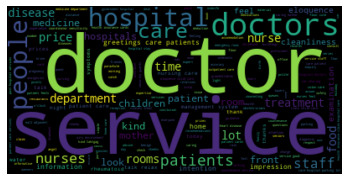

In [32]:
vizwordcloud(poshist)

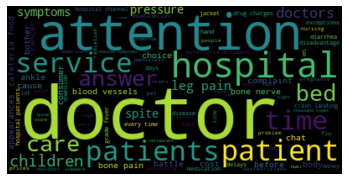

In [33]:
vizwordcloud(neghist)

We saw 2 problems: 1) Singular and plural words were not combined and 2) words that should not be appeared in the wordcloud such as *patients* because of the co-reference resolution problem.  

Let's transfrom selected words to their singular form because at this stage the number of words is not much already then add categories to filter out.

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

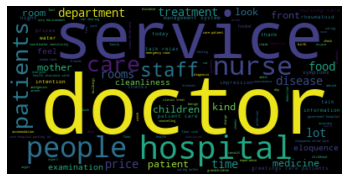

In [36]:
vizwordcloud(poshist)

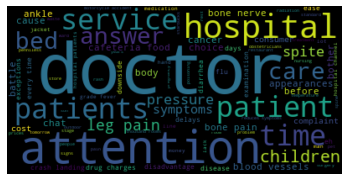

In [37]:
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment"):
        return "process"
    elif word in ("price", "claim"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount = poshist.groupby("category").size().reset_index(name="#")
poscount = poscount[poscount["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount = neghist.groupby("category").size().reset_index(name="#")
negcount = negcount[negcount["category"] != "others"].reset_index(drop=True)

# Plot Radar Chart

In [41]:
poscount

,category,#
0,finance,2
1,infrastructure,1
2,service,5
3,staff,2


In [42]:
negcount

,category,#
0,infrastructure,1
1,service,5
2,staff,1


In [0]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

In [44]:
fig = px.line_polar(poscount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'

In [45]:
fig_2 = px.line_polar(negcount, r="#", theta="category", line_close=True)
plot(fig_2)

'temp-plot.html'

#Extracting Features from cleaned comments

In [0]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['sentences'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
#Term Frequency-Inverse Document Frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(df['sentences'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.402487,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.678839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484593,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335925,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.570952,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.532169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


#Splitting our dataset into Training and Validation Set

In [49]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [50]:
#Using features from TF-IDF for training set
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder ()
df['sentiments'] = number.fit_transform(df['sentiments'].astype('str'))
df

,cids,sentences,sentiments,NP
0,0,What is really like a lot of people in this ho...,2,"[lot, people, hospital]"
1,0,Most smiling Greetings care patients and those...,2,"[Greetings care patients, service]"
2,0,Talk relax at all,2,[Talk relax]
3,0,Most of the doctors I had the good hearted peo...,1,"[doctors, people, someone]"
4,0,The Department of Medicine Private rooms are O...,2,"[rooms, price]"
...,...,...,...,...
310,76,You make little treat,2,[treat]
311,77,Impressive fast enough,2,[]
312,78,If you find a common disease such as flu usual...,0,"[disease, flu, doctor, hospital channel]"
313,79,Good nursing care is a preliminary inquiry,2,"[nursing care, inquiry]"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



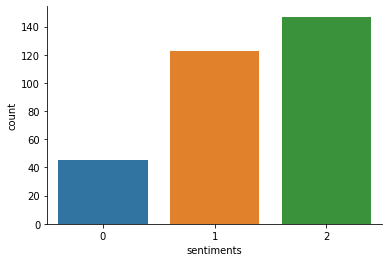

In [52]:
# Neutral label : 0 , Negative label : 1 , Positive  label : 2
import seaborn as sns
sns.countplot(df['sentiments'])
sns.despine()

In [0]:
#Splitting the data into training and validation set
from sklearn.model_selection import train_test_split

In [0]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,df['sentiments'],test_size=0.3,random_state=0)

In [56]:
x_train_bow.shape

(220, 237)

In [57]:
x_valid_bow.shape

(95, 237)

In [58]:
y_train_bow.shape

(220,)

In [59]:
y_valid_bow.shape

(95,)

#Applying Machine Learning Models

In [0]:
from sklearn.metrics import f1_score

In [0]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [62]:
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[0.06476952, 0.04478725, 0.89044323],
       [0.0688247 , 0.6114077 , 0.3197676 ],
       [0.07741902, 0.65965246, 0.26292851],
       [0.06285499, 0.7248907 , 0.21225431],
       [0.11313012, 0.34475001, 0.54211987],
       [0.11315154, 0.59554496, 0.2913035 ],
       [0.4736922 , 0.11873475, 0.40757304],
       [0.02949456, 0.19258661, 0.77791883],
       [0.14105645, 0.10005252, 0.75889103],
       [0.1326155 , 0.40589756, 0.46148694],
       [0.15981589, 0.27861653, 0.56156758],
       [0.53292881, 0.35255255, 0.11451865],
       [0.15292865, 0.64498628, 0.20208507],
       [0.11236727, 0.33592959, 0.55170315],
       [0.0708516 , 0.71063443, 0.21851397],
       [0.11531886, 0.63604669, 0.24863445],
       [0.07362187, 0.79042248, 0.13595566],
       [0.07014628, 0.75568909, 0.17416463],
       [0.05048472, 0.89388511, 0.05563017],
       [0.21448722, 0.61051497, 0.17499781],
       [0.39532545, 0.46101468, 0.14365987],
       [0.12011475, 0.41742097, 0.46246428],
       [0.

In [64]:
#Calculating the F1 score
# if prediction is equal to 2 else 1 where 2 is for positive comments and 1 for negative sentiment comments
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int,average='micro')

log_bow

0.3157894736842105

In [65]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.15795424, 0.26168902, 0.58035674],
       [0.1004615 , 0.47510799, 0.42443051],
       [0.11299884, 0.49708521, 0.38991596],
       [0.12213513, 0.56911635, 0.30874852],
       [0.13909105, 0.40237131, 0.45853763],
       [0.13588329, 0.4715015 , 0.39261521],
       [0.2917903 , 0.20890461, 0.49930509],
       [0.07731372, 0.28066458, 0.64202169],
       [0.20036562, 0.18148581, 0.61814858],
       [0.12058307, 0.37248348, 0.50693345],
       [0.14232076, 0.32603105, 0.53164818],
       [0.28911904, 0.4734963 , 0.23738467],
       [0.18229461, 0.52371124, 0.29399415],
       [0.13888684, 0.42264919, 0.43846396],
       [0.10978168, 0.53890821, 0.35131011],
       [0.1433703 , 0.51655213, 0.34007757],
       [0.1112435 , 0.64892307, 0.23983344],
       [0.12358472, 0.60476438, 0.2716509 ],
       [0.10966749, 0.69112039, 0.19921212],
       [0.19182472, 0.54363241, 0.26454287],
       [0.24115215, 0.47725788, 0.28158997],
       [0.15060173, 0.37093713, 0.47846113],
       [0.

In [67]:
prediction_int_tfidf = prediction_tfidf[:,1]>=0.3

prediction_int_tfidf = prediction_int.astype(np.int)
prediction_int_tfidf

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int_tfidf,average='micro')

log_tfidf

0.3157894736842105

In [68]:
#XGBoost
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=0,learning_rate=0.9)
model_bow.fit(x_train_bow, y_train_bow)
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[2.61838036e-03, 9.79261659e-03, 9.87589061e-01],
       [1.29186893e-02, 9.02924180e-01, 8.41571465e-02],
       [4.80738878e-02, 8.03489327e-01, 1.48436725e-01],
       [2.49560308e-02, 7.65258372e-01, 2.09785551e-01],
       [1.47378324e-02, 1.21445797e-01, 8.63816381e-01],
       [8.11155587e-02, 6.68425560e-01, 2.50458866e-01],
       [7.81121850e-01, 3.43009382e-02, 1.84577182e-01],
       [9.74368711e-04, 4.56950590e-02, 9.53330517e-01],
       [2.63031334e-01, 3.72933783e-03, 7.33239293e-01],
       [1.65743217e-01, 3.22494954e-01, 5.11761844e-01],
       [3.04958642e-01, 2.45619342e-01, 4.49422002e-01],
       [5.25468290e-01, 4.69311565e-01, 5.22015383e-03],
       [8.11155587e-02, 6.68425560e-01, 2.50458866e-01],
       [2.63827927e-02, 2.76656419e-01, 6.96960747e-01],
       [7.58187845e-02, 6.24777973e-01, 2.99403250e-01],
       [8.11155587e-02, 6.68425560e-01, 2.50458866e-01],
       [3.89174148e-02, 8.40918124e-01, 1.20164521e-01],
       [1.19722947e-01, 4.07841

In [69]:
xgb = xgb[:,1] >= 0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int,average='micro')

xgb_bow

0.3157894736842105

In [70]:
model_tfidf = XGBClassifier(random_state=2,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[2.81518064e-02, 7.34860897e-02, 8.98362100e-01],
       [6.33304520e-03, 9.36939657e-01, 5.67273386e-02],
       [6.73106462e-02, 7.56653905e-01, 1.76035434e-01],
       [1.08966738e-01, 2.27875233e-01, 6.63158059e-01],
       [4.46525291e-02, 2.80094326e-01, 6.75253153e-01],
       [1.01132445e-01, 6.34379029e-01, 2.64488578e-01],
       [3.01911980e-01, 3.22040796e-01, 3.76047254e-01],
       [1.10618840e-03, 1.11678252e-02, 9.87726033e-01],
       [6.58259243e-02, 4.78980467e-02, 8.86276007e-01],
       [1.70795843e-01, 3.82527053e-01, 4.46677089e-01],
       [8.24474871e-01, 5.66101633e-02, 1.18914999e-01],
       [2.62610316e-01, 7.31612384e-01, 5.77727845e-03],
       [1.01132445e-01, 6.34379029e-01, 2.64488578e-01],
       [2.94183400e-02, 8.10937047e-01, 1.59644559e-01],
       [1.01132445e-01, 6.34379029e-01, 2.64488578e-01],
       [1.01132445e-01, 6.34379029e-01, 2.64488578e-01],
       [6.52170926e-02, 7.64222682e-01, 1.70560271e-01],
       [9.04208422e-02, 7.27022

In [71]:
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf,average='micro')

score

0.3157894736842105

In [72]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=0)
dct.fit(x_train_bow,y_train_bow)
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.83333333, 0.16666667],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 1.        , 0.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 1.        , 0.        ],
       [0.5       , 0.5       , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.

In [73]:
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow,average='micro')

dct_score_bow

0.29473684210526313

In [74]:
dct.fit(x_train_tfidf,y_train_tfidf)
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 0.83333333, 0.16666667],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.

In [75]:
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf,average='micro')

dct_score_tfidf

0.28421052631578947

#Model Comparison

In [76]:
# Bag-of-Words
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.315789,0.315789,0.294737


In [77]:
# TF-IDF
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,score,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.315789,0.315789,0.284211


#Evaluating the model

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [79]:
print (y_valid_bow)

65     2
314    1
150    2
158    0
108    2
      ..
209    0
89     1
206    1
27     2
166    0
Name: sentiments, Length: 95, dtype: int64


In [80]:
print (y_valid_tfidf)

65     2
314    1
150    2
158    0
108    2
      ..
209    0
89     1
206    1
27     2
166    0
Name: sentiments, Length: 95, dtype: int64


#Comparison Graph

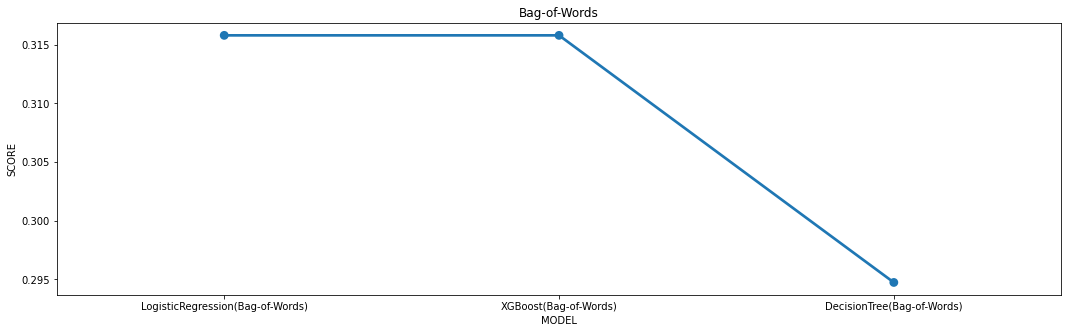

In [81]:
# Bag-of-Words
import seaborn as sns
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

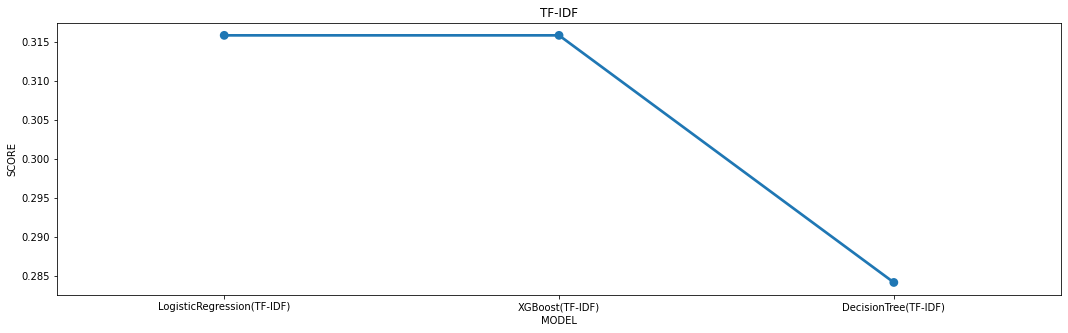

In [82]:
# TF-IDF
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

#Playing around with auto-sklearn 
####since F1 score quite low so I try to use auto ML to improve score - try auto-sklearn

In [83]:
!apt-get install swig -y
!pip install Cython numpy

# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn
# ignore some annoying warnings for demonstrating auto-sklearn 
# shouldn't be done in real production
import numpy as np
np.warnings.filterwarnings('ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 3s (404 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking 

In [0]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [0]:
#bag-of-words
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = sklearn.model_selection.train_test_split(df_bow,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
#tfidf
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = sklearn.model_selection.train_test_split(df_tfidf,df['sentiments'],test_size=0.3,random_state=0)

In [91]:
x_train_tfidf.head

<bound method NDFrame.head of      0    1    2    3    4         5    ...  231  232  233       234  235  236
272  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0  0.0
37   0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0  0.0
306  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0  0.0
184  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0  0.0
254  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0  0.0
..   ...  ...  ...  ...  ...       ...  ...  ...  ...  ...       ...  ...  ...
251  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0  0.0
192  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0  0.0
117  0.0  0.0  0.0  0.0  0.0  0.379418  ...  0.0  0.0  0.0  0.000000  0.0  0.0
47   0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.000000  0.0  0.0
172  0.0  0.0  0.0  0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.581519  0.0  0.0

[220 rows x 237 colum

In [92]:
y_train_tfidf.head

<bound method NDFrame.head of 272    0
37     0
306    1
184    1
254    1
      ..
251    2
192    1
117    1
47     1
172    1
Name: sentiments, Length: 220, dtype: int64>

In [93]:
import autosklearn.classification

# configure auto-sklearn
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120, # run auto-sklearn for at most 2min
          per_run_time_limit=30, # spend at most 30 sec for each model training
          )

# train model(s)
automl.fit(x_train_tfidf, y_train_tfidf)

# evaluate
y_hat = automl.predict(x_valid_tfidf)
test_acc = sklearn.metrics.accuracy_score(y_valid_tfidf, y_hat)
print("Accuracy score {0}".format(test_acc))
print("", sklearn.metrics.confusion_matrix(y_valid_tfidf, y_hat))
print("", sklearn.metrics.classification_report(y_valid_tfidf, y_hat))

[WARNING] [2020-04-25 05:51:03,075:EnsembleBuilder(1):76e631e6a0cf94c6d4eaf6a5d2a29f8a] No models better than random - using Dummy Score!
[WARNING] [2020-04-25 05:51:03,094:EnsembleBuilder(1):76e631e6a0cf94c6d4eaf6a5d2a29f8a] No models better than random - using Dummy Score!
[WARNING] [2020-04-25 05:51:05,099:EnsembleBuilder(1):76e631e6a0cf94c6d4eaf6a5d2a29f8a] No models better than random - using Dummy Score!
[WARNING] [2020-04-25 05:51:07,106:EnsembleBuilder(1):76e631e6a0cf94c6d4eaf6a5d2a29f8a] No models better than random - using Dummy Score!
[WARNING] [2020-04-25 05:51:09,111:EnsembleBuilder(1):76e631e6a0cf94c6d4eaf6a5d2a29f8a] No models better than random - using Dummy Score!
[WARNING] [2020-04-25 05:51:11,120:EnsembleBuilder(1):76e631e6a0cf94c6d4eaf6a5d2a29f8a] No models better than random - using Dummy Score!
[WARNING] [2020-04-25 05:51:13,131:EnsembleBuilder(1):76e631e6a0cf94c6d4eaf6a5d2a29f8a] No models better than random - using Dummy Score!
[WARNING] [2020-04-25 05:51:15,137